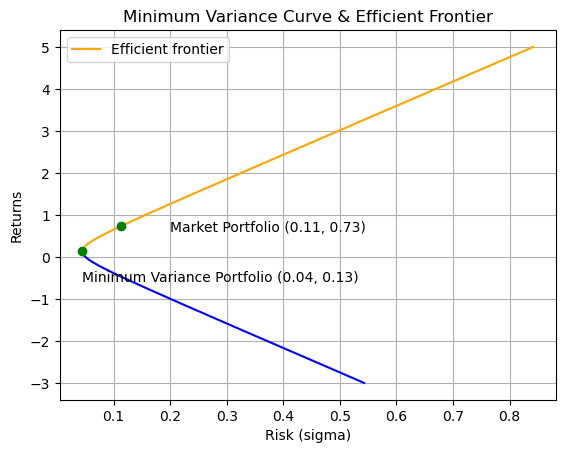

Market Portfolio Weights 	=  [ 0.16717781  0.80678275 -0.13672333 -0.11229863 -1.33821595 -0.09587922
  0.8077656   0.21009916  0.66790775  0.02338407]
Return 				=  0.7316375702821264
Risk 				=  11.274712810115835  %


In [8]:
import numpy as np
import math
import matplotlib.pyplot as plt
import pandas as pd

# if using a Jupyter notebook, kindly uncomment the following line:
# %matplotlib inline

def plot_fixed(x, y, x_axis, y_axis, title):
    plt.plot(x, y)
    plt.xlabel(x_axis)
    plt.ylabel(y_axis) 
    plt.title(title)
    plt.grid(True)
    plt.show()


def plot_fixed_both(x1, y1, x2, y2, x_axis, y_axis, title):
    plt.plot(x1, y1, color='Blue', label='Minimum Variance Curve')
    plt.plot(x2, y2, color='Green', label='CML')
    plt.xlabel(x_axis)
    plt.ylabel(y_axis) 
    plt.title(title)
    plt.grid(True)
    plt.legend()
    plt.show()


def compute_weights(M, C, mu):
    C_inverse = np.linalg.inv(C)
    u = [1 for _ in range(len(M))]

    p = [[1, np.dot(u, C_inverse @ np.transpose(M))], [mu, np.dot(M, C_inverse @ np.transpose(M))]]
    q = [[np.dot(u, C_inverse @ np.transpose(u)), 1], [np.dot(M, C_inverse @ np.transpose(u)), mu]]
    r = [[np.dot(u, C_inverse @ np.transpose(u)), np.dot(u, C_inverse @ np.transpose(M))],
         [np.dot(M, C_inverse @ np.transpose(u)), np.dot(M, C_inverse @ np.transpose(M))]]

    det_p, det_q, det_r = np.linalg.det(p), np.linalg.det(q), np.linalg.det(r)
    det_p /= det_r
    det_q /= det_r

    w = det_p * (u @ C_inverse) + det_q * (M @ C_inverse)
  
    return w


def main():
    df = pd.read_csv('./18130_data.csv')  # Change the path to the new CSV file
    df.set_index('Date', inplace=True)
    df = df.pct_change()
    M = np.mean(df, axis=0) * 12
    C = df.cov()

    returns = np.linspace(-3, 5, num=5000)
    u = np.array([1 for _ in range(len(M))])
    risk = []

    for mu in returns:
        w = compute_weights(M, C, mu)
        sigma = math.sqrt(np.dot(w, C @ np.transpose(w)))
        risk.append(sigma)
  
    weight_min_var = np.dot(u, np.linalg.inv(C)) / (np.dot(u, np.linalg.inv(C) @ np.transpose(u)))
    mu_min_var = np.dot(weight_min_var, np.transpose(M))
    risk_min_var = math.sqrt(np.dot(weight_min_var, C @ np.transpose(weight_min_var)))

    returns_plot1, risk_plot1, returns_plot2, risk_plot2 = [], [], [], []
    for i in range(len(returns)):
        if returns[i] >= mu_min_var: 
            returns_plot1.append(returns[i])
            risk_plot1.append(risk[i])
        else:
            returns_plot2.append(returns[i])
            risk_plot2.append(risk[i])

    mu_rf = 0.02  # taking any risk-free rate

    market_portfolio_weights = (M - mu_rf * u) @ np.linalg.inv(C) / ((M - mu_rf * u) @ np.linalg.inv(C) @ np.transpose(u))
    mu_market = np.dot(market_portfolio_weights, np.transpose(M))
    risk_market = math.sqrt(np.dot(market_portfolio_weights, C @ np.transpose(market_portfolio_weights)))

    plt.plot(risk_plot1, returns_plot1, color='orange', label='Efficient frontier')  # Change color
    plt.plot(risk_plot2, returns_plot2, color='blue')
    plt.xlabel("Risk (sigma)")
    plt.ylabel("Returns") 
    plt.title("Minimum Variance Curve & Efficient Frontier")
    plt.plot(risk_market, mu_market, color='green', marker='o')
    plt.annotate(f'Market Portfolio ({round(risk_market, 2)}, {round(mu_market, 2)})', 
                 xy=(risk_market, mu_market), xytext=(0.2, 0.6))
    plt.plot(risk_min_var, mu_min_var, color='green', marker='o')
    plt.annotate(f'Minimum Variance Portfolio ({round(risk_min_var, 2)}, {round(mu_min_var, 2)})', 
                 xy=(risk_min_var, mu_min_var), xytext=(risk_min_var, -0.6))
    plt.legend()
    plt.grid(True)
    plt.show()
    print("Market Portfolio Weights \t= ", market_portfolio_weights)
    print("Return \t\t\t\t= ", mu_market)
    print("Risk \t\t\t\t= ", risk_market * 100, " %")


if __name__ == "__main__":
    main() 
